<a href="https://colab.research.google.com/github/yawpAI/colab/blob/main/numpystack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np  
import matplotlib.pyplot as plt
import tensorflow as tf



In [15]:
A = np.array([[0.3, 0.6, 0.1],[0.5, 0.2, 0.3],[0.4,0.1,0.5]])
v = np.array([1/3, 1/3, 1/3])
print(A)
print(v)

[[0.3 0.6 0.1]
 [0.5 0.2 0.3]
 [0.4 0.1 0.5]]
[0.33333333 0.33333333 0.33333333]


In [16]:
v1s = []
distances = []
vee = v
for i in range(25):
  v1 = vee.dot(A)
  v1s.append(v1)
  distances.append(np.linalg.norm(vee - v1))
  vee = v1



In [17]:
v1s

[array([0.4, 0.3, 0.3]),
 array([0.39, 0.33, 0.28]),
 array([0.394, 0.328, 0.278]),
 array([0.3934, 0.3298, 0.2768]),
 array([0.39364, 0.32968, 0.27668]),
 array([0.393604, 0.329788, 0.276608]),
 array([0.3936184, 0.3297808, 0.2766008]),
 array([0.39361624, 0.32978728, 0.27659648]),
 array([0.3936171 , 0.32978685, 0.27659605]),
 array([0.39361697, 0.32978724, 0.27659579]),
 array([0.39361703, 0.32978721, 0.27659576]),
 array([0.39361702, 0.32978723, 0.27659575]),
 array([0.39361702, 0.32978723, 0.27659575]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.32978723, 0.27659574]),
 array([0.39361702, 0.3297

In [18]:
distances

[0.08164965809277262,
 0.03741657386773942,
 0.004898979485566406,
 0.002244994432064385,
 0.00029393876913402604,
 0.00013469966592392243,
 1.7636326148047455e-05,
 8.08197995540597e-06,
 1.0581795688239251e-06,
 4.849187973169401e-07,
 6.349077410586669e-08,
 2.909512781972964e-08,
 3.809446394228636e-09,
 1.7457076294233546e-09,
 2.285667795745017e-10,
 1.0474244352286645e-10,
 1.3714019918660252e-11,
 6.2845801410349365e-12,
 8.228692970339167e-13,
 3.7704157935026525e-13,
 4.9381248718457325e-14,
 2.2639704286750972e-14,
 2.94627755741752e-15,
 1.3653937842860002e-15,
 2.0770370905276122e-16]

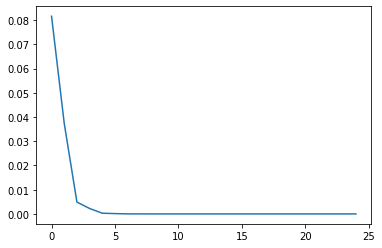

In [20]:
plt.plot(distances)

In [21]:
v1s[-1]

array([0.39361702, 0.32978723, 0.27659574])

In [22]:
v1s[-1].dot(A)

array([0.39361702, 0.32978723, 0.27659574])

In [25]:
np.allclose(v1s[-1].dot(np.eye(3)), v1s[-1].dot(A)) #found the eigenvector (last v1 after the iteration) for which eigenvalue == 1

True

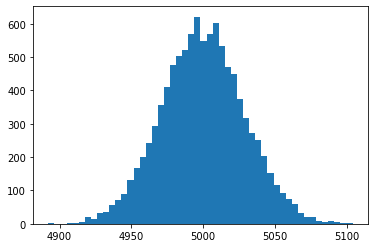

In [32]:
# CLT sum an of any iid RV approaches normal
sums = []
for i in range(10000):
  X = np.random.random(10000)
  sums.append(X.sum())

plt.hist(np.array(sums), bins=50);

In [33]:
#mean should be 0.5 * 10000 = 5000
np.array(sums).mean()

4999.8402649388245

In [34]:
# var of uniform is (b-a)^2 / 12
# var of a sum is the sum of the vars, so should be
10000/12


833.3333333333334

In [36]:
np.array(sums).var()

823.7763094231077

In [38]:
MNIST_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
path = tf.keras.utils.get_file('mnist.npz', MNIST_URL)
with np.load(path) as data:
  train_examples=data['x_train']
  train_labels=data['y_train']
  test_examples=data['x_test']
  test_labels=data['y_test']




11493376/11490434 [==============================] - 0s 0us/step


In [44]:
train_examples[0].shape

(28, 28)

In [53]:
# compute the mean image for each digit
mean_img = []
for i in range(10):
  indices = np.where(train_labels == i)
  sum = np.zeros((28,28))
  count = 0
  for idx in np.nditer(indices):
    sum += train_examples[idx]
    count += 1
  mean_img.append(sum / count)
  

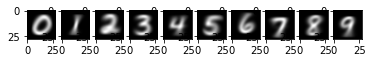

In [66]:
plt.imshow(mean_img[3], cmap='gray')
pos = 1
for i in range(len(mean_img)):
  plt.subplot(1,10,pos)
  plt.imshow(mean_img[i], cmap='gray')
  pos += 1